In [1]:
from phi.torch.flow import *
from tqdm.notebook import trange

C:\Users\imeho\Documents\VituralEnvs\InstantPINF-TCNN\Lib\site-packages\phi\vis\_matplotlib\_matplotlib_plots.py:167: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # because subplot titles can be added after figure creation


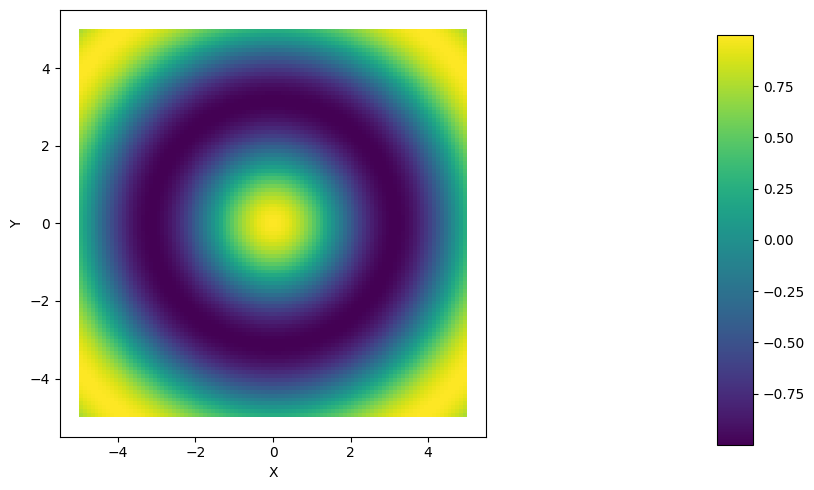

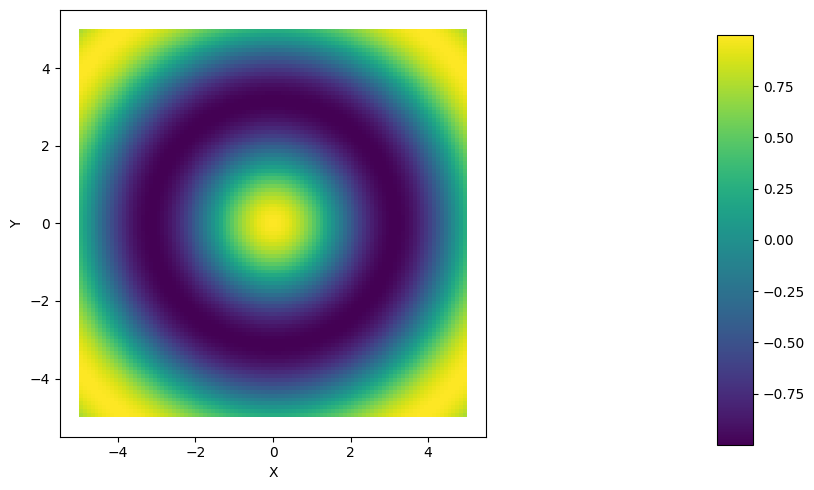

In [2]:
def potential(pos):
    return math.cos(math.vec_length(pos))

landscape = CenteredGrid(potential, x=100, y=100, bounds=Box(x=(-5, 5), y=(-5, 5)))
plot(landscape)

In [3]:
net = dense_net(2, 1, [32, 64, 32])
optimizer = adam(net)

def loss_function(x, label):
    prediction = math.native_call(net, x)
    return math.l2_loss(prediction - label), prediction

input_data = rename_dims(landscape.points, spatial, batch)
labels = rename_dims(landscape.values, spatial, batch)
loss_function(input_data, labels)[0]

(xᵇ=100, yᵇ=100) 0.238 ± 0.192 (3e-08...7e-01)

  0%|          | 0/200 [00:00<?, ?it/s]

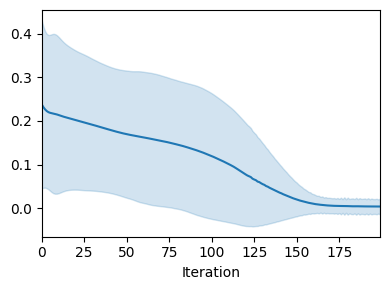

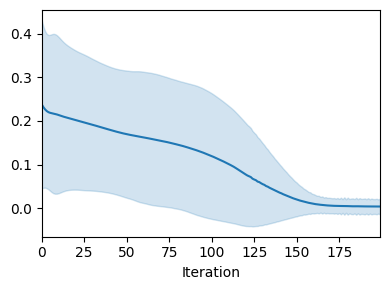

In [4]:
loss_trj = []
pred_trj = []
for i in trange(200):
    loss, pred = update_weights(net, optimizer, loss_function, input_data, labels)
    loss_trj.append(loss)
    pred_trj.append(pred)
loss_trj = stack(loss_trj, spatial('iteration'))
pred_trj = stack(pred_trj, batch('iteration'))
plot(math.mean(loss_trj, 'x,y'), err=math.std(loss_trj, 'x,y'), size=(4, 3))

###### pred_grid = rename_dims(pred_trj.iteration[::4], 'x,y', spatial)
plot(pred_grid, animate='iteration', size=(6, 5))